In [6]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, simplify
from sympy.solvers import solve

print("\nElectrical Circuits\n")
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic")
il =  Symbol("il")
r =  Symbol("r")
omega = Symbol("omega")
c =  Symbol("c")
l =  Symbol("l")


Electrical Circuits



In [7]:
eq1 = (vr + vo - 1, 
       ir - ic - il, 
       vr - ir*r,
       # 1j is the imaginary number
       vo - ic/(1j*omega*c),
       # complete the following line:
       vo - 1j*omega*l*il)

In [8]:
# Then we solve for variables vo, vr, ir, ic,il
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = simplify(sol[vo])
# compare the output of the following line if vos = sol[vo]
print(vos)

l*omega/(I*c*l*omega**2*r + l*omega - I*r)


RuntimeError: matplotlib does not support generators as input

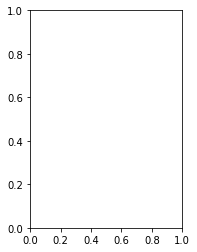

In [9]:
numvalue = {c: 10**-6, l: 10**-3}
# what does subs()?
# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
vosnum = vos.subs(numvalue)
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)]
omega_axis = np.linspace(20000, 43246, 100)
# what does 121 in the following line mean?
# what are the other possible parameters of subplot()?
plt.subplot(121)
# describe (python type, dimensions, etc) of the input parameter/s of zip() below
# what does zip(*a) do if a is a 2-D list or numpy array?
plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist]))
plt.xlim(20000, 43246)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks([20000, 30000, 40000])

# plt.subplot(122)
# # Replicate Fig. 2.6, right pane following the code for Fig. 2.6, left pane
# plt.plot(omega_axis, # ...
# # ...
plt.show()

In [ ]:
def vsaw(t, T=1.0): 
    # complete this function

omegares = 1./np.sqrt(np.prod(numvalue.values()))
alist = (1/np.sqrt(256)) * vsaw(np.arange(256)/256.0)
blist = np.sqrt(256) * np.fft.fft(alist)

def plot3(fac, w):
    # add a docstring for this function
    omegai = fac * omegares
    # How were the limits of arange() in the following line chosen?
    volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(1, 129)],
                             [0.0],
                             [complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(-127, 0)]))
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1])
    # what does the following line do?
    plt.axhline(0)
    # add labels
    plt.show()

In [ ]:
plot3(1, 2700.0)
plot3(1/3., 200.0)
plot3(3.0, 5.0)

eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = # complete this line
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
# why should irs be passed to sympy.abs() before squaring?
power = (r**2) *( sympy.abs(irs)**2)
flist3 = [sympy.abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
            for s in range(0, 3)]
omega_axis = np.linspace(10000, 70000, 1000)
lines = # ...
# what does plt.setp() do?
plt.setp(lines[0], lw=2)
plt.setp(lines[1], ls='--'
# add labels and ticks
plt.minorticks_on()
plt.show()

# replicate fig. 2.10